In [1]:
!pip install tensorflow==2.0.0alpha

In [0]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import pandas as pd
import numpy as np


In [0]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
# Train test split

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)


In [7]:
train.shape

(1119, 12)

In [8]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1259,6.8,0.640,0.00,2.7,0.123,15.0,33.0,0.99538,3.44,0.63,11.3,6
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
319,9.6,0.770,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4,6
950,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7


In [9]:
test.shape

(480, 12)

In [0]:
# Normalize the data. Extremely Important
train_x = train.drop('quality', axis=1)
train_y = train['quality']
train_x=(train_x-train_x.min())/(train_x.max()-train_x.min())

test_x = test.drop('quality', axis=1)
test_y = test['quality']
test_x=(test_x-test_x.min())/(test_x.max()-test_x.min())

In [11]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1589,0.169643,0.500000,0.20,0.475862,0.101836,0.417910,0.268382,0.560206,0.433071,0.125749,0.123077
1259,0.187500,0.429752,0.00,0.124138,0.185309,0.208955,0.099265,0.389868,0.551181,0.179641,0.446154
353,0.785714,0.338843,0.79,0.268966,0.180301,0.328358,0.261029,0.861233,0.346457,0.263473,0.707692
319,0.437500,0.537190,0.12,0.137931,0.116861,0.432836,0.250000,0.629956,0.440945,0.185629,0.307692
950,0.375000,0.000000,0.45,0.062069,0.105175,0.134328,0.055147,0.400147,0.527559,0.257485,0.538462


In [12]:
train_y.head()

1589    5
1259    6
353     5
319     6
950     7
Name: quality, dtype: int64

In [13]:
train_y.max()

8

In [14]:
train_y.min()

3

In [0]:
no_features = train_x.shape[1]

In [16]:
no_features

11

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=[no_features]),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [0]:
model.compile(optimizer='adam',loss=['mse'], 
              metrics=['mae'])

In [0]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['loss'] < 0.35:
            print("MSE less than 0.35. No futher training required. Otherwise \
                  data will overfit")
            self.model.stop_training = True

In [0]:
callbacks = MyCallback()

In [21]:
history = model.fit(train_x, train_y, epochs=500, callbacks=[callbacks])

Epoch 1/500
1119/1119 [==============================] - 0s 138us/sample - loss: 21.4582 - mae: 4.4709
Epoch 2/500
1119/1119 [==============================] - 0s 33us/sample - loss: 1.5766 - mae: 0.9800
Epoch 3/500
1119/1119 [==============================] - 0s 34us/sample - loss: 0.8562 - mae: 0.7304
Epoch 4/500
1119/1119 [==============================] - 0s 33us/sample - loss: 0.7703 - mae: 0.6905
Epoch 5/500
1119/1119 [==============================] - 0s 35us/sample - loss: 0.6875 - mae: 0.6454
Epoch 6/500
1119/1119 [==============================] - 0s 42us/sample - loss: 0.6486 - mae: 0.6205
Epoch 7/500
1119/1119 [==============================] - 0s 36us/sample - loss: 0.6249 - mae: 0.6051
Epoch 8/500
1119/1119 [==============================] - 0s 36us/sample - loss: 0.6056 - mae: 0.5947
Epoch 9/500
1119/1119 [==============================] - 0s 35us/sample - loss: 0.6093 - mae: 0.5963
Epoch 10/500
1119/1119 [==============================] - 0s 35us/sample - loss: 0.5745 -

In [0]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Epochs')

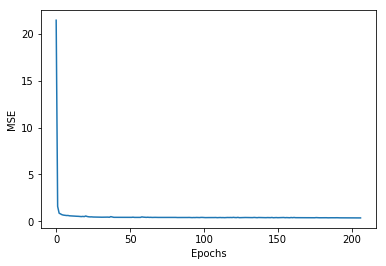

In [23]:
plt.plot(history.epoch, history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

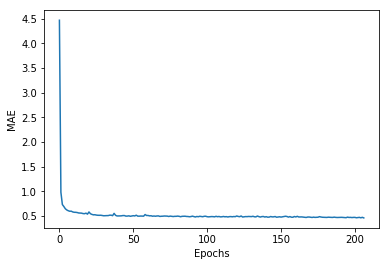

In [24]:
plt.plot(history.epoch, history.history['mae'])
plt.ylabel('MAE')
plt.xlabel('Epochs')

In [25]:
test_mse, test_mae = model.evaluate(test_x, test_y)

480/480 [==============================] - 0s 104us/sample - loss: 0.4313 - mae: 0.4993


In [26]:
test_mse

0.43132680654525757

In [27]:
test_mae

0.4993079

In [0]:
train.to_csv('train_data.csv',index=None)

In [0]:
test.to_csv('test_data.csv',index=None)

In [0]:
tf.saved_model.save(model, 'saved_model')